# 22-explore-product-date

In [1]:
import pandas as pd
import numpy as np
#import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import sys
# !{sys.executable} -m pip install missingno

## Load product data

In [3]:
sales = pd.read_csv('/data/p_dsi/teams2023/bridgestone_data/data/sales_data_sample.csv', sep = ',')

In [4]:
sales.head()

,Unnamed: 0,STORE_ID,TRAN_ID,DATE,ARTICLE_ID,INDIV_ID,VEHICLE_ID,UNITS,SALES
0,0,337934,990994590,2018-07-23,7046930,318422234.0,944814728,0.0,0.00
1,1,337934,990994590,2018-07-23,7001647,318422234.0,944814728,0.0,-8.55
2,2,337934,990994590,2018-07-23,7001715,318422234.0,944814728,0.0,-50.45
3,3,337934,990994590,2018-07-23,7096547,318422234.0,944814728,0.0,10.00
4,4,337934,990994590,2018-07-23,7001647,318422234.0,944814728,0.0,0.00


In [5]:
df = pd.read_csv('/data/p_dsi/teams2023/bridgestone_data/data/product.csv', sep = '|')

In [6]:
df

,ARTICLE_ID,PROD_GROUP_CODE,PROD_GROUP_DESC,CATEGORY_CODE,CATEGORY_DESC,SEGMENT_CODE,SEGMENT_DESC,CLASS_CODE,CLASS_DESC,DISCOUNT_FLAG,CROSS_SECTION,ASPECT_RATIO,RIM_SIZE
0,45438,5.0,Tires,26.0,Passenger Tires,29.0,Performance Tires,37.0,S/T Performance Tires,N,195,60,14
1,20257,5.0,Tires,26.0,Passenger Tires,29.0,Performance Tires,37.0,S/T Performance Tires,N,225,60,16
2,53872,5.0,Tires,26.0,Passenger Tires,29.0,Performance Tires,37.0,S/T Performance Tires,N,215,60,14
3,20192,5.0,Tires,26.0,Passenger Tires,29.0,Performance Tires,37.0,S/T Performance Tires,N,195,65,15
4,45500,5.0,Tires,26.0,Passenger Tires,29.0,Performance Tires,37.0,S/T Performance Tires,N,175,70,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56837,7053192,4.0,Services,117974.0,EV/Hybrid Systems,117976.0,EV/Hybrid Inspections & Services,117979.0,Other EV/Hybrid Services,N,NaN,NaN,NaN
56838,7001052,4.0,Services,81.0,Miscellaneous Services,115.0,Employee Discounts,508.0,Employee Discounts Services,E,NaN,NaN,NaN
56839,7001053,3.0,Other,6.0,Other,20580.0,Employee Tire Discount,125366.0,Teammate Best Tire Savings Discount,E,NaN,NaN,NaN
56840,7053195,4.0,Services,117974.0,EV/Hybrid Systems,117976.0,EV/Hybrid Inspections & Services,117979.0,Other EV/Hybrid Services,N,NaN,NaN,NaN


## Summary Statistics

In [7]:
# df["CATEGORY_CODE" == 44.0|"CATEGORY_CODE" == 26.0]
hahahaha = df[(df["CATEGORY_CODE"] == 44.0) | (df["CATEGORY_CODE"] == 26.0)]
hahahaha.info()
#penguins.loc[(penguins.loc[:, 'bill_depth_mm'] >= 17) & (penguins.loc[:, 'bill_depth_mm'] <= 18)]
# realized the code and desc relaionthip --> further reduce the columns 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32563 entries, 0 to 56822
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ARTICLE_ID       32563 non-null  int64  
 1   PROD_GROUP_CODE  32563 non-null  float64
 2   PROD_GROUP_DESC  32563 non-null  object 
 3   CATEGORY_CODE    32563 non-null  float64
 4   CATEGORY_DESC    32563 non-null  object 
 5   SEGMENT_CODE     32563 non-null  float64
 6   SEGMENT_DESC     32563 non-null  object 
 7   CLASS_CODE       32563 non-null  float64
 8   CLASS_DESC       32563 non-null  object 
 9   DISCOUNT_FLAG    32563 non-null  object 
 10  CROSS_SECTION    31964 non-null  object 
 11  ASPECT_RATIO     31959 non-null  object 
 12  RIM_SIZE         31963 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 3.5+ MB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56842 entries, 0 to 56841
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ARTICLE_ID       56842 non-null  int64  
 1   PROD_GROUP_CODE  56818 non-null  float64
 2   PROD_GROUP_DESC  56818 non-null  object 
 3   CATEGORY_CODE    56818 non-null  float64
 4   CATEGORY_DESC    56818 non-null  object 
 5   SEGMENT_CODE     56818 non-null  float64
 6   SEGMENT_DESC     56818 non-null  object 
 7   CLASS_CODE       56818 non-null  float64
 8   CLASS_DESC       56818 non-null  object 
 9   DISCOUNT_FLAG    56818 non-null  object 
 10  CROSS_SECTION    35670 non-null  object 
 11  ASPECT_RATIO     35665 non-null  object 
 12  RIM_SIZE         35504 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 5.6+ MB


In [9]:
df.describe()

,ARTICLE_ID,PROD_GROUP_CODE,CATEGORY_CODE,SEGMENT_CODE,CLASS_CODE
count,5.684200e+04,56818.000000,56818.000000,56818.000000,56818.000000
mean,5.212672e+06,4.476979,1550.873332,6084.788905,8206.250150
std,3.099825e+06,0.756366,13492.723305,21480.847899,23718.348449
min,9.000000e+00,3.000000,6.000000,7.000000,8.000000
25%,3.590418e+05,4.000000,26.000000,29.000000,38.000000
50%,7.014038e+06,5.000000,26.000000,30.000000,42.000000
75%,7.085217e+06,5.000000,45.000000,103.000000,389.000000
max,7.012695e+07,5.000000,123641.000000,123644.000000,125366.000000


In [10]:
## wouldn't really make sesne cuz they are categorical variables

In [11]:
df.isnull().sum()

ARTICLE_ID             0
PROD_GROUP_CODE       24
PROD_GROUP_DESC       24
CATEGORY_CODE         24
CATEGORY_DESC         24
SEGMENT_CODE          24
SEGMENT_DESC          24
CLASS_CODE            24
CLASS_DESC            24
DISCOUNT_FLAG         24
CROSS_SECTION      21172
ASPECT_RATIO       21177
RIM_SIZE           21338
dtype: int64

In [12]:
# dropping rows with missing values
df_new = df.dropna(axis=0)

print('# of rows of original dataframe planets: ', len(df))
print('# of rows of returned dataframe planets_new: ', len(df_new))

# of rows of original dataframe planets:  56842
# of rows of returned dataframe planets_new:  35500


In [13]:
df_new['PROD_GROUP_CODE'].value_counts()

5.0    35495
3.0        4
4.0        1
Name: PROD_GROUP_CODE, dtype: int64

In [14]:
df_new['CATEGORY_CODE'].value_counts()
df_new['CATEGORY_DESC'].value_counts()

Passenger Tires           26770
Light Truck Tires          5189
Others                     2852
Motorcycle                  661
Road Hazard                  23
Other                         4
Miscellaneous Services        1
Name: CATEGORY_DESC, dtype: int64

In [15]:
df_new['SEGMENT_CODE'].value_counts()
df_new['SEGMENT_DESC'].value_counts()

Performance Tires                   12888
Touring                              5922
P Metric Light Truck Tires           3822
Recreational Tires                   2834
Snow Tires-PS                        2164
Commercial Tires                     1218
P-Metric CUV/SUV                     1091
Commercial/Recreational               960
Agricultural Tires                    937
Medium Truck Tires                    782
Other Passenger Tires                 649
Motorcycle Tire                       617
Tubes                                 403
Industrial Tires                      286
Import Tires                          234
Miscellaneous Tire Related Items      226
Off-The-Road Tires                    218
Snow Tires-LT                         176
Motorcycle Tire Accessory              44
Road Hazard                            23
Other                                   4
Other L/T Tires                         1
Non-System Services                     1
Name: SEGMENT_DESC, dtype: int64

In [16]:
df_new['CLASS_CODE'].value_counts()
df_new['CLASS_DESC'].value_counts()

Ultra High Performance Summer        6112
Car & Minivan All-Season             4299
Highway Tires                        3807
All Terrain Tires                    3351
Performance All-Season               2854
Snow Tires                           2164
Touring H/V/Z Tires                  1910
Ultra High Performance All Season     991
CUV/SUV Highway All-Season            972
Mass Market Tires                     934
S/T Performance Tires                 785
Max Traction Tires                    716
Radial Tires                          692
Economy Tires                         689
Other Passenger Tires                 649
Moto Tire                             617
Rear Ag Tires                         485
Highway All-Season                    449
Tubes                                 403
All-Terrain                           395
Industrial Tires                      286
UHP Competition                       236
Import Tires                          234
Small Off-the-Road Tires          

<AxesSubplot:xlabel='SEGMENT_CODE'>

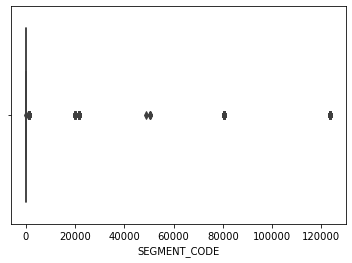

In [17]:
# fig, ax = plt.subplots(6, 2, figsize = (15, 13))
# sns.boxplot(x= df_new["SEGMENT_CODE"], ax = ax[0,123644])
# sns.distplot(df_new['SEGMENT_CODE'], ax = ax[0,123644])
sns.boxplot(x= df_new["SEGMENT_CODE"])

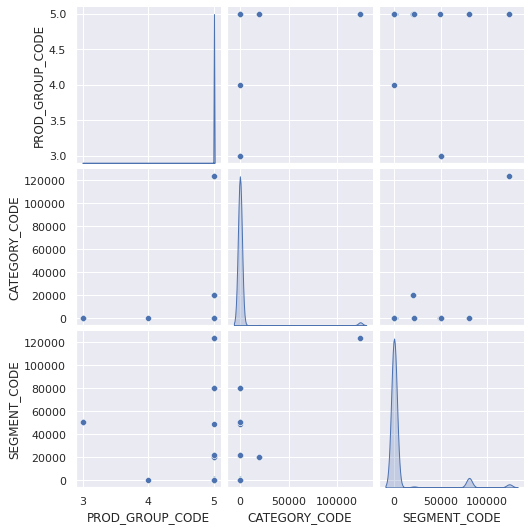

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_new.iloc[:, 1:7:2]
sns.pairplot(cData_attr, diag_kind='kde')   

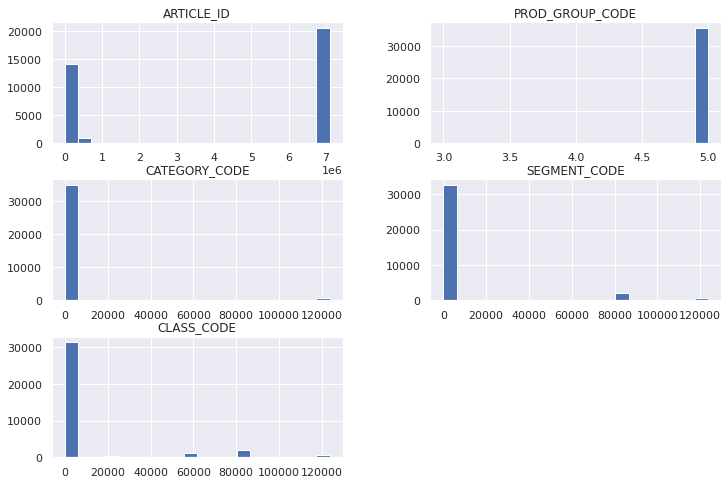

In [19]:
df_new.hist(figsize=(12,8),bins=20)
plt.show()

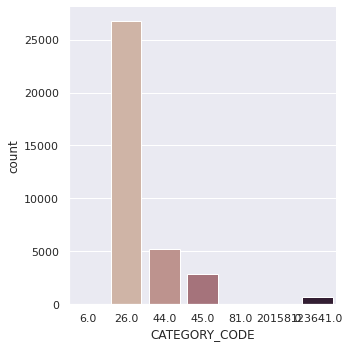

In [20]:
sns.catplot(data=df_new, x='CATEGORY_CODE', kind="count", palette="ch:.25")

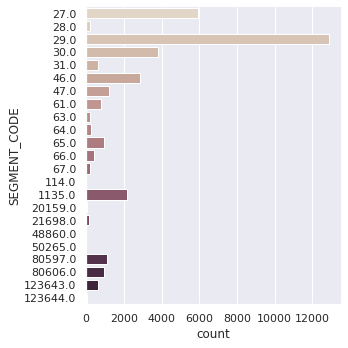

In [21]:
sns.catplot(data=df_new, y='SEGMENT_CODE', kind="count", palette="ch:.25")

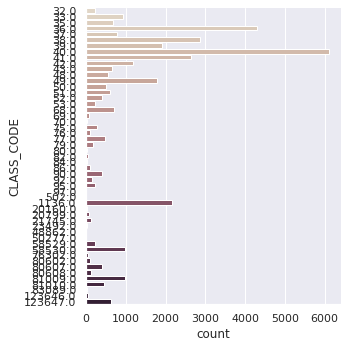

In [22]:
sns.catplot(data=df_new, y='CLASS_CODE', kind="count", palette="ch:.25")

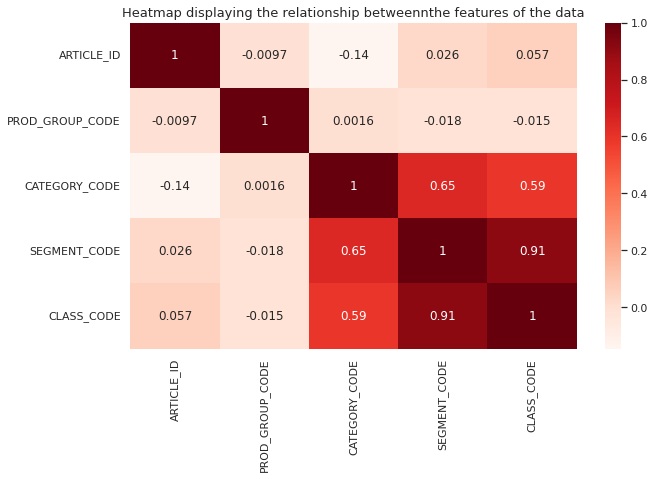

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df_new.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()

## Conclusion

1. Found the relationship between CODE and DESC. This can further help us reduce the columns for mahcine learning process
2. Need to think about how to deal with NA values. Droppoing wouldn't be a good idea. Also filling a mean values wouldn't help, as the data is mostly categorical variables
3. Plotted distribution plots

# tire sales data

In [24]:
tire_sales = df[(df["CATEGORY_CODE"] == 44.0) | (df["CATEGORY_CODE"] == 26.0)]
tire_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32563 entries, 0 to 56822
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ARTICLE_ID       32563 non-null  int64  
 1   PROD_GROUP_CODE  32563 non-null  float64
 2   PROD_GROUP_DESC  32563 non-null  object 
 3   CATEGORY_CODE    32563 non-null  float64
 4   CATEGORY_DESC    32563 non-null  object 
 5   SEGMENT_CODE     32563 non-null  float64
 6   SEGMENT_DESC     32563 non-null  object 
 7   CLASS_CODE       32563 non-null  float64
 8   CLASS_DESC       32563 non-null  object 
 9   DISCOUNT_FLAG    32563 non-null  object 
 10  CROSS_SECTION    31964 non-null  object 
 11  ASPECT_RATIO     31959 non-null  object 
 12  RIM_SIZE         31963 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 3.5+ MB


In [25]:
tire_sales.ARTICLE_ID.values

array([  45438,   20257,   53872, ..., 7094599,   11568,   11525])

In [26]:
ARTICLE_ID_list = tire_sales["ARTICLE_ID"].unique().tolist()

In [27]:
len(ARTICLE_ID_list)

32563